In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pymc3 as pm
from stldecompose import decompose
from statsmodels.tsa import arima_model

%matplotlib inline
sns.set(rc={'figure.figsize':(25,10)})

#sns.set(rc={'figure.figsize':(25,10)})

WARNING (theano.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [2]:
sns.set(rc={'figure.figsize':(25,10)})

In [3]:
pd.to_datetime('2018-10-20 22:16:16')

Timestamp('2018-10-20 22:16:16')

In [4]:
pd.to_datetime('2018-10-20T22:16:16Z') #ISO 8601

Timestamp('2018-10-20 22:16:16+0000', tz='UTC')

In [5]:
pd.to_datetime('2018-10-20 22:16:16',utc=True)

Timestamp('2018-10-20 22:16:16+0000', tz='UTC')

In [9]:
pd.to_datetime('31/7/2007') #dd/mm/yy

Timestamp('2007-07-31 00:00:00')

In [10]:
pd.to_datetime('7/31/2007') #dd/mm/yy

Timestamp('2007-07-31 00:00:00')

In [11]:
pd.to_datetime('7/31/2007', dayfirst=True) #dd/mm/yy

Timestamp('2007-07-31 00:00:00')

In [3]:
pd.date_range(start='2019/01/01', freq='1B', periods=26)

DatetimeIndex(['2019-01-01', '2019-01-02', '2019-01-03', '2019-01-04',
               '2019-01-07', '2019-01-08', '2019-01-09', '2019-01-10',
               '2019-01-11', '2019-01-14', '2019-01-15', '2019-01-16',
               '2019-01-17', '2019-01-18', '2019-01-21', '2019-01-22',
               '2019-01-23', '2019-01-24', '2019-01-25', '2019-01-28',
               '2019-01-29', '2019-01-30', '2019-01-31', '2019-02-01',
               '2019-02-04', '2019-02-05'],
              dtype='datetime64[ns]', freq='B')

In [ ]:
# D es daily, B es business daily, M month, Q quaterly, etc.

In [19]:
pd.timedelta_range(start='1 day', end= '5 day', periods=6)

TimedeltaIndex(['1 days 00:00:00', '1 days 19:12:00', '2 days 14:24:00',
                '3 days 09:36:00', '4 days 04:48:00', '5 days 00:00:00'],
               dtype='timedelta64[ns]', freq=None)

In [20]:
pd.timedelta_range(start='1 day', periods=6, freq='H')

TimedeltaIndex(['1 days 00:00:00', '1 days 01:00:00', '1 days 02:00:00',
                '1 days 03:00:00', '1 days 04:00:00', '1 days 05:00:00'],
               dtype='timedelta64[ns]', freq='H')

In [2]:
data = pd.read_excel('Data/muestra.xls')

In [4]:
data.head(10)

Id. del pedido Fecha del pedido Fecha de envío Forma de envío  \
0  MX-2018-143658       2018-10-02     2018-10-06       Estándar   
1  MX-2016-155047       2016-10-16     2016-10-21       Estándar   
2  MX-2016-155047       2016-10-16     2016-10-21       Estándar   
3  MX-2016-155047       2016-10-16     2016-10-21       Estándar   
4  MX-2016-155047       2016-10-16     2016-10-21       Estándar   
5  MX-2016-155047       2016-10-16     2016-10-21       Estándar   
6  MX-2017-134096       2017-09-28     2017-10-02       Estándar   
7  MX-2017-134096       2017-09-28     2017-10-02       Estándar   
8  MX-2017-134096       2017-09-28     2017-10-02       Estándar   
9  MX-2017-134096       2017-09-28     2017-10-02       Estándar   

  Id. del cliente Nombre del cliente Segmento            Ciudad  \
0        RC-20575         Reyes Coto  Cliente  Ciudad de México   
1        IG-16570         Iván Girón  Cliente     Dos Quebradas   
2        IG-16570         Iván Girón  Cliente     Dos Quebradas   
3        IG-16570         Iván Girón  Cliente     Dos Quebradas   
4        IG-16570         Iván Girón  Cliente     Dos Quebradas   
5        IG-16570         Iván Girón  Cliente     Dos Quebradas   
6        CV-13000   Cristina Vázquez  Cliente         São Paulo   
7        CV-13000   Cristina Vázquez  Cliente         São Paulo   
8        CV-13000   Cristina Vázquez  Cliente         São Paulo   
9        CV-13000   Cristina Vázquez  Cliente         São Paulo   

             Estado      País Región Id. del producto            Categoría  \
0  Distrito Federal    México  Norte  MAT-ET-10000866  Material de oficina   
1         Risaralda  Colombia    Sur  MOB-MO-10000543           Mobiliario   
2         Risaralda  Colombia    Sur  MOB-LI-10000111           Mobiliario   
3         Risaralda  Colombia    Sur  MAT-CA-10004211  Material de oficina   
4         Risaralda  Colombia    Sur  MAT-AR-10001135  Material de oficina   
5         Risaralda  Colombia    Sur  MAT-SO-10000727  Material de oficina   
6         São Paulo    Brasil    Sur  MAT-SO-10000727  Material de oficina   
7         São Paulo    Brasil    Sur  TEC-MÁ-10002159           Tecnología   
8         São Paulo    Brasil    Sur  MAT-SU-10004093  Material de oficina   
9         São Paulo    Brasil    Sur  TEC-AC-10001207           Tecnología   

  Subcategoría                                Nombre del producto   Total  \
0    Etiquetas  Hon Etiquetas para carpetas de archivos, Ajust...   130.8   
1   Mobiliario                              Tenex Reloj, Duradero  2521.6   
2    Librerías                               Ikea Vitrina, Blanco  1932.8   
3     Carpetas                     Cardinal Carpeta, Transparente   354.4   
4         Arte                  Sanford Lienzos, Tamaños variados   716.0   
5       Sobres                           GlobeWeis Paquetes, Rojo   561.2   
6       Sobres                           GlobeWeis Paquetes, Rojo   561.2   
7     Máquinas                 Konica Impresora de tarjetas, Rojo  3446.4   
8  Suministros                            Elite Cúter, Industrial   973.6   
9   Accesorios                             Enermax Router, Blanco  3415.2   

   Cantidad  Descuento  Ganancia  
0         3        0.0      45.6  
1         8        0.0     907.2  
2         2        0.0     540.8  
3         4        0.0      49.6  
4         2        0.0     114.4  
5         2        0.0     213.2  
6         2        0.0     213.2  
7         3        0.0    1654.2  
8         4        0.0     194.4  
9         2        0.0     136.4

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10288 entries, 0 to 10287
Data columns (total 20 columns):
Id. de la fila         10288 non-null int64
Id. del pedido         10288 non-null object
Fecha del pedido       10288 non-null datetime64[ns]
Fecha de envío         10288 non-null datetime64[ns]
Forma de envío         10288 non-null object
Id. del cliente        10288 non-null object
Nombre del cliente     10288 non-null object
Segmento               10288 non-null object
Ciudad                 10288 non-null object
Estado                 10288 non-null object
País                   10288 non-null object
Región                 10288 non-null object
Id. del producto       10288 non-null object
Categoría              10288 non-null object
Subcategoría           10288 non-null object
Nombre del producto    10288 non-null object
Total                  10288 non-null float64
Cantidad               10288 non-null int64
Descuento              10288 non-null float64
Ganancia            

In [6]:
data.describe()

Id. de la fila         Total      Cantidad     Descuento      Ganancia
count    10288.000000  10288.000000  10288.000000  10288.000000  10288.000000
mean      5144.500000   2103.767977      3.742710      0.135260    215.619571
std       2970.034119   3491.500914      2.200417      0.195493   1188.219441
min          1.000000     15.660000      1.000000      0.000000 -18062.400000
25%       2572.750000    328.950000      2.000000      0.000000     -7.250000
50%       5144.500000    804.660000      3.000000      0.000000     80.400000
75%       7716.250000   2278.550000      5.000000      0.400000    326.450000
max      10288.000000  34740.800000     14.000000      0.800000  13132.800000

In [7]:
# Drop rows with missing values and drop duplicate
data.dropna(inplace=True)
data.drop_duplicates(inplace=True)

# Visualize pairplot of df
#sns.pairplot(data, hue='Subcategoría');

In [8]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('(', '').str.replace(')', '').str.replace('.', '')

In [9]:
#data = data.set_index('Fecha del pedido')
#data = data.sort_index()
data.head()

id_de_la_fila   id_del_pedido fecha_del_pedido fecha_de_envío  \
0              1  MX-2018-143658       2018-10-02     2018-10-06   
1              2  MX-2016-155047       2016-10-16     2016-10-21   
2              3  MX-2016-155047       2016-10-16     2016-10-21   
3              4  MX-2016-155047       2016-10-16     2016-10-21   
4              5  MX-2016-155047       2016-10-16     2016-10-21   

  forma_de_envío id_del_cliente nombre_del_cliente segmento            ciudad  \
0       Estándar       RC-20575         Reyes Coto  Cliente  Ciudad de México   
1       Estándar       IG-16570         Iván Girón  Cliente     Dos Quebradas   
2       Estándar       IG-16570         Iván Girón  Cliente     Dos Quebradas   
3       Estándar       IG-16570         Iván Girón  Cliente     Dos Quebradas   
4       Estándar       IG-16570         Iván Girón  Cliente     Dos Quebradas   

             estado      país región  id_del_producto            categoría  \
0  Distrito Federal    México  Norte  MAT-ET-10000866  Material de oficina   
1         Risaralda  Colombia    Sur  MOB-MO-10000543           Mobiliario   
2         Risaralda  Colombia    Sur  MOB-LI-10000111           Mobiliario   
3         Risaralda  Colombia    Sur  MAT-CA-10004211  Material de oficina   
4         Risaralda  Colombia    Sur  MAT-AR-10001135  Material de oficina   

  subcategoría                                nombre_del_producto   total  \
0    Etiquetas  Hon Etiquetas para carpetas de archivos, Ajust...   130.8   
1   Mobiliario                              Tenex Reloj, Duradero  2521.6   
2    Librerías                               Ikea Vitrina, Blanco  1932.8   
3     Carpetas                     Cardinal Carpeta, Transparente   354.4   
4         Arte                  Sanford Lienzos, Tamaños variados   716.0   

   cantidad  descuento  ganancia  
0         3        0.0      45.6  
1         8        0.0     907.2  
2         2        0.0     540.8  
3         4        0.0      49.6  
4         2        0.0     114.4

In [10]:
data['Anio'] = data.fecha_del_pedido.year
#data['Mes'] = data.index.month
#data['Semana'] = data.index.week
#data['Dia_semana'] = data.index.day_name()

AttributeError: 'Series' object has no attribute 'year'

In [ ]:
data['Dia_semana'].value_counts()

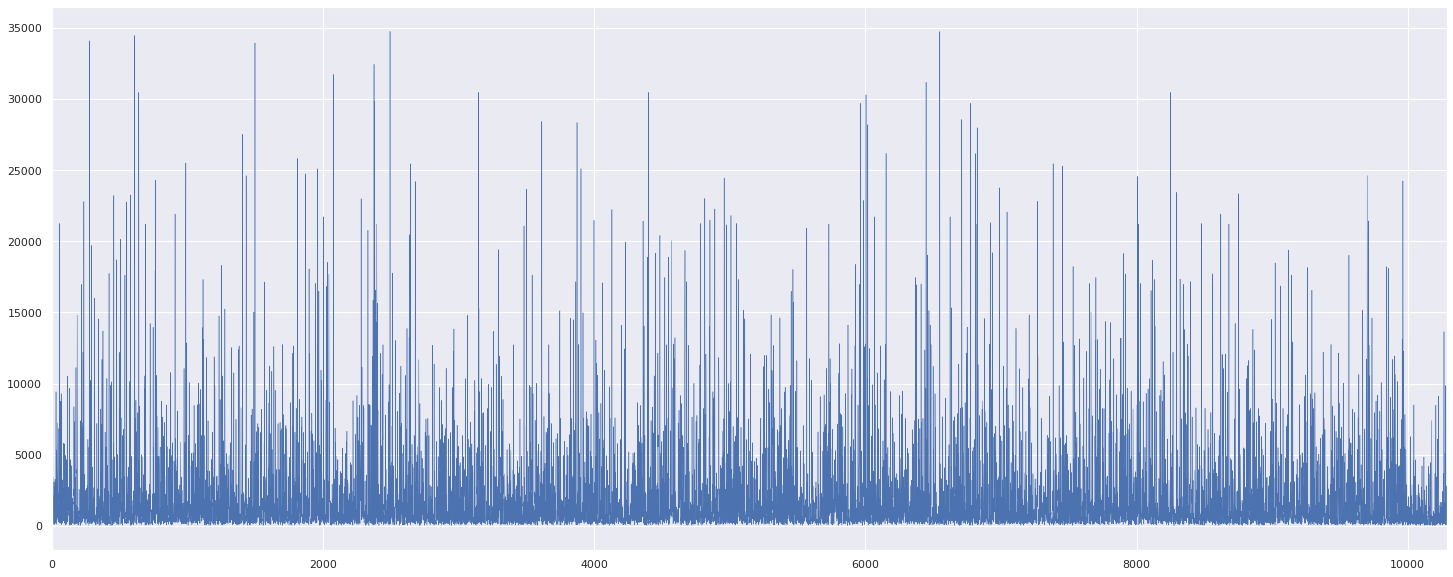

In [11]:
data['total'].plot(linewidth=0.5)

In [ ]:
df_g = data.groupby(["Fecha del pedido","Semana"])
df_g_sum = data.groupby(["Fecha del pedido","Semana"]).sum()

In [19]:
df_g_sum.head()

Id. de la fila       Total  Cantidad  Descuento  \
Fecha del pedido Semana                                                    
2015-01-03       1                 8187   1952.0000         4      0.000   
2015-01-04       1                60366  25602.5224        38      0.602   
2015-01-05       2                 6006  30288.0000         8      0.000   
2015-01-07       2                17917    615.8000         7      0.000   
2015-01-08       2                17131   4466.0000        10      0.000   

                          Ganancia   Anio  Mes  
Fecha del pedido Semana                         
2015-01-03       1        448.8000   2015    1  
2015-01-04       1       6132.5224  18135    9  
2015-01-05       2       9993.6000   2015    1  
2015-01-07       2         84.0000   4030    2  
2015-01-08       2       2028.2000   4030    2

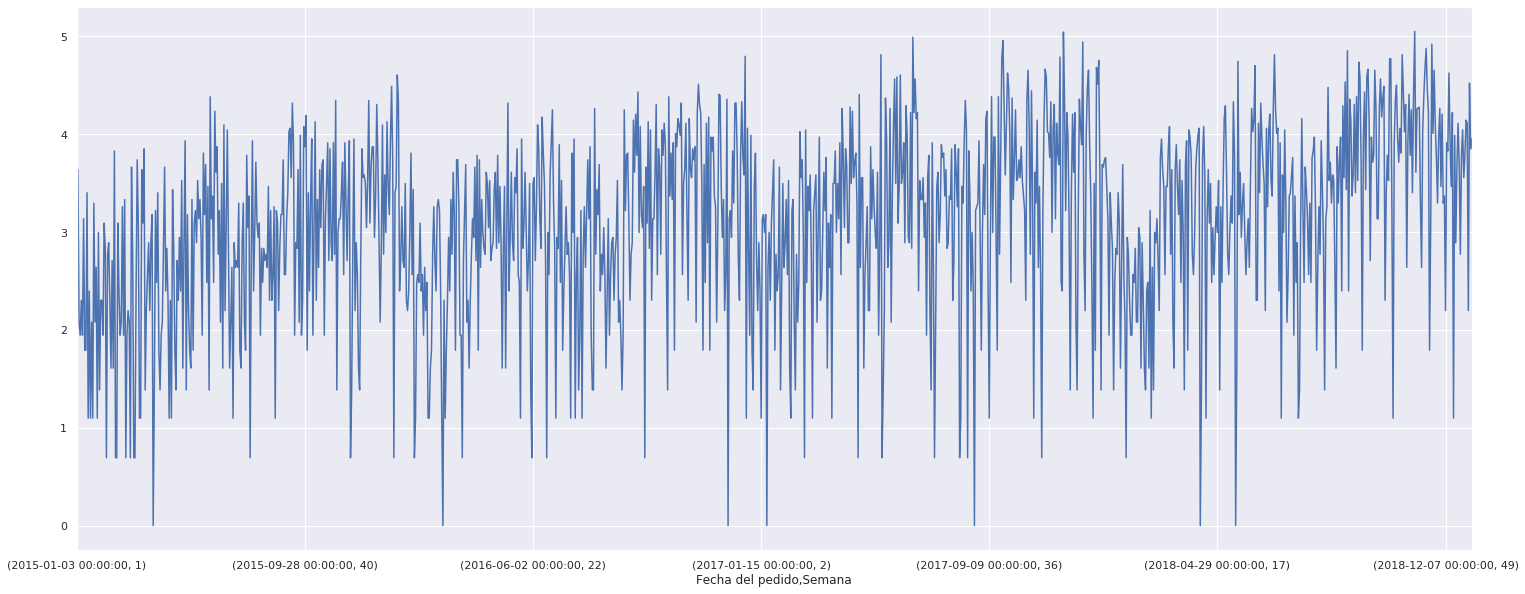

In [14]:
df_g_dem = df_g_sum['Cantidad']
np.log(df_g_dem).plot()

In [13]:
data['fecha_del_pedido'] = pd.to_datetime(data['fecha_del_pedido']) - pd.to_timedelta(7, unit='d')

In [14]:
data1 = data.groupby(['id_del_producto', pd.Grouper(key='fecha_del_pedido', freq='W-MON')])['cantidad'].sum().reset_index().sort_values('fecha_del_pedido')#.reset_index()
print (data1)

      id_del_producto fecha_del_pedido  cantidad
9691  TEC-TE-10001721       2014-12-29         4
4831  MAT-SO-10002386       2014-12-29         6
5548  MAT-SU-10003372       2014-12-29         8
4729  MAT-SO-10001461       2014-12-29         6
2480  MAT-EL-10002387       2014-12-29         8
...               ...              ...       ...
9182  TEC-CO-10003453       2018-12-24         3
3310  MAT-GR-10000334       2018-12-24         8
3478  MAT-GR-10001635       2018-12-24         5
4816  MAT-SO-10002251       2018-12-24         4
262   MAT-AL-10001856       2018-12-24         2

[10129 rows x 3 columns]


In [15]:
data11 = data1.set_index('fecha_del_pedido')
data11 = data11.sort_index()
data11.head()
#data11= data11.drop('index')

id_del_producto  cantidad
fecha_del_pedido                           
2014-12-29        TEC-TE-10001721         4
2014-12-29        MAT-SO-10002386         6
2014-12-29        MAT-SU-10003372         8
2014-12-29        MAT-SO-10001461         6
2014-12-29        MAT-EL-10002387         8

array(['MAT-ET-10001984', 'TEC-CO-10002709'], dtype=object)

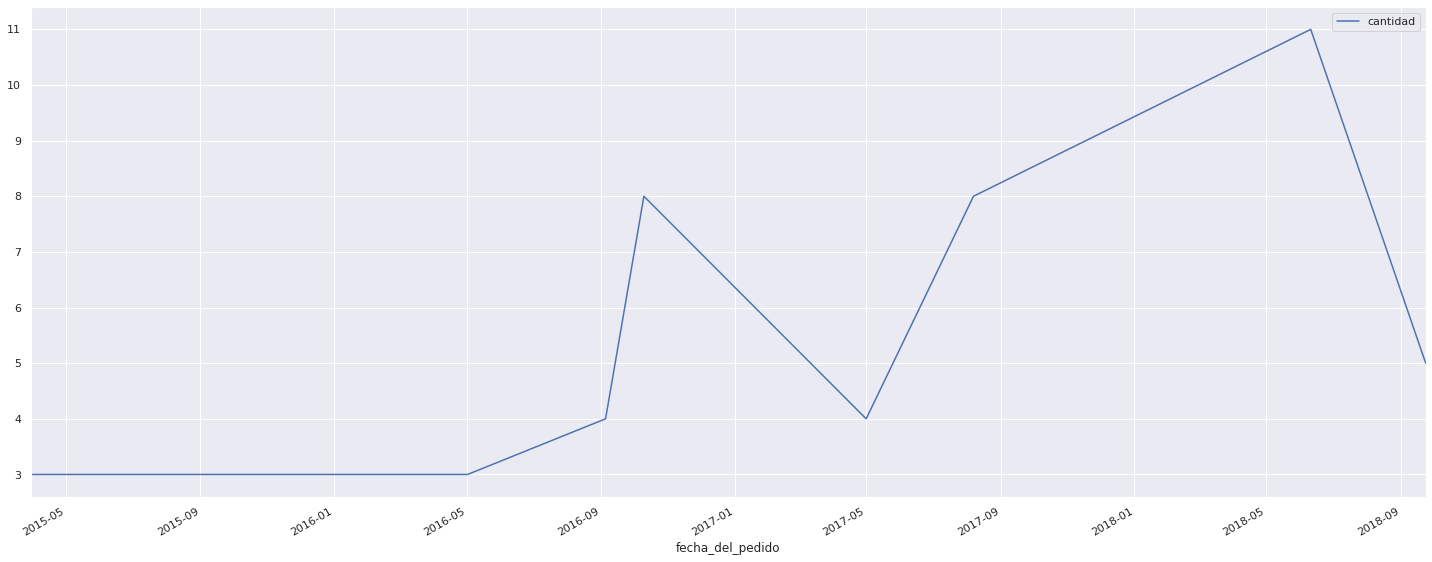

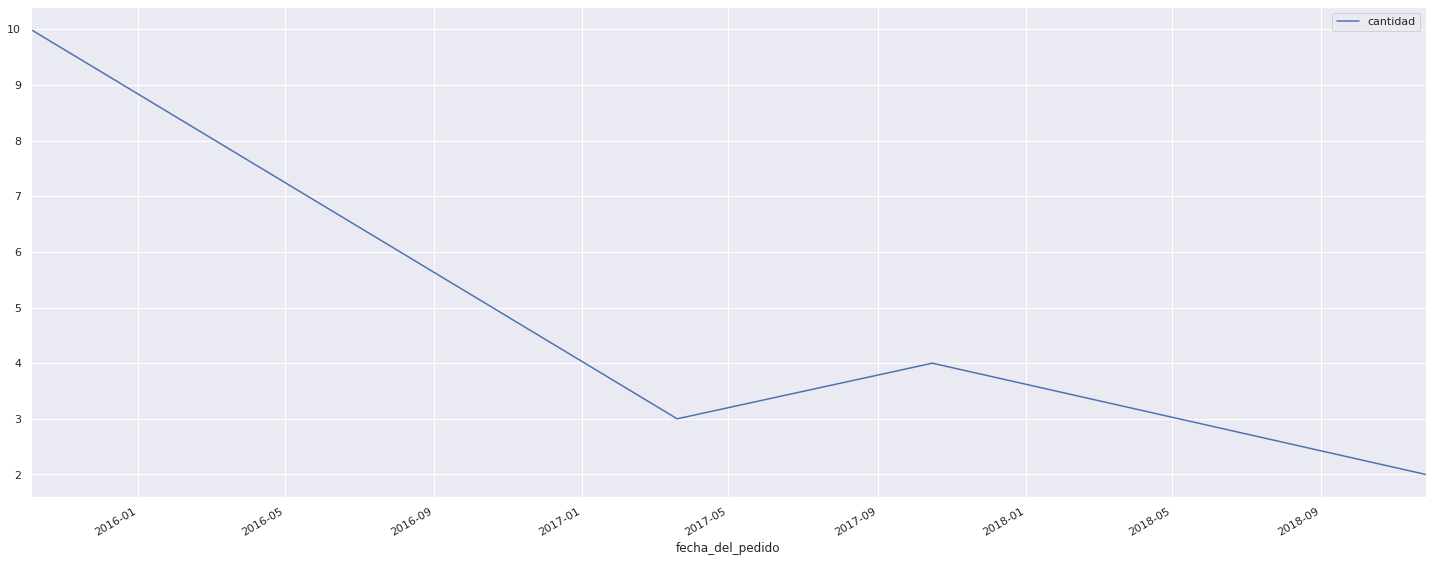

In [16]:
rows = np.random.choice(data11.id_del_producto, 2)
for x in rows:
    y = data11[data11.id_del_producto == x]
    y.plot()
#df200 = data11[data11.id_del_producto == 'rows']
#df200.head()
rows

In [20]:
data1.to_csv("data_retail_producto.csv", index=False)

In [ ]:
fecha_maxima = pd.Timestamp('2007-12-30')
act = act[act.index > pd.Timestamp('2015-12-30')]
act = act[act.index <= fecha_maxima]

In [26]:
data2 = data.groupby([pd.Grouper(key='fecha_del_pedido', freq='W-MON')])['cantidad'].sum().reset_index().sort_values('fecha_del_pedido')
print (data2)

    fecha_del_pedido  cantidad
0         2014-12-29        50
1         2015-01-05        53
2         2015-01-12        61
3         2015-01-19        55
4         2015-01-26        44
..               ...       ...
204       2018-11-26       392
205       2018-12-03       330
206       2018-12-10       264
207       2018-12-17       253
208       2018-12-24       368

[209 rows x 2 columns]


In [27]:
data2.columns = ['ds','y']

In [21]:
data2.to_csv("data_retail_semanal.csv", index=False)

In [23]:
data2 = data2.set_index('fecha_del_pedido')
data2 = data2.sort_index()
data2.head()

cantidad
fecha_del_pedido          
2014-12-29              50
2015-01-05              53
2015-01-12              61
2015-01-19              55
2015-01-26              44

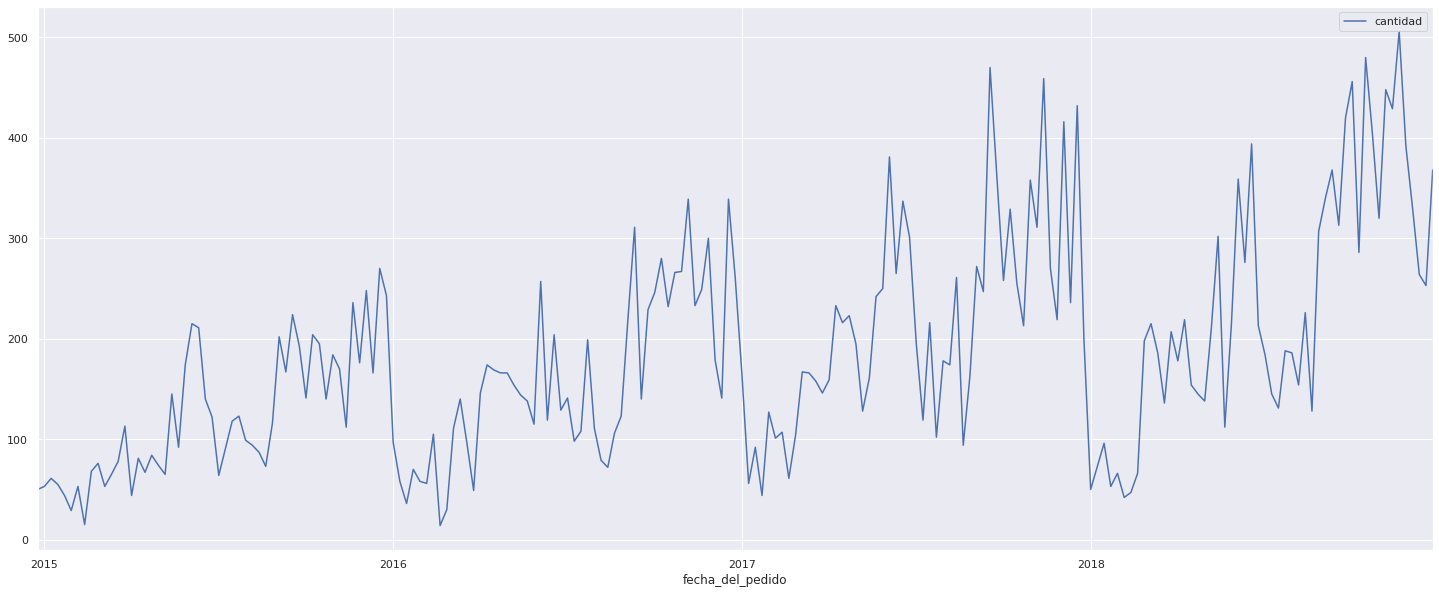

In [24]:
#np.log(data2).plot()
data2.plot()

In [73]:
act = np.log(data2)

In [79]:
act.head()

cantidad
fecha_del_pedido          
2014-12-29        3.912023
2015-01-05        3.970292
2015-01-12        4.110874
2015-01-19        4.007333
2015-01-26        3.784190

In [80]:
fecha_maxima = pd.Timestamp('2017-12-30')
#act = act[act.index > pd.Timestamp('2015-12-30')]
act_train = act[act.index <= fecha_maxima]
act_test = act[act.index > fecha_maxima]

In [88]:
act_train.head(9)

cantidad
fecha_del_pedido          
2014-12-29        3.912023
2015-01-05        3.970292
2015-01-12        4.110874
2015-01-19        4.007333
2015-01-26        3.784190
2015-02-02        3.367296
2015-02-09        3.970292
2015-02-16        2.708050
2015-02-23        4.219508

In [85]:
stl = decompose(act_train, period=52, lo_frac=0.2)

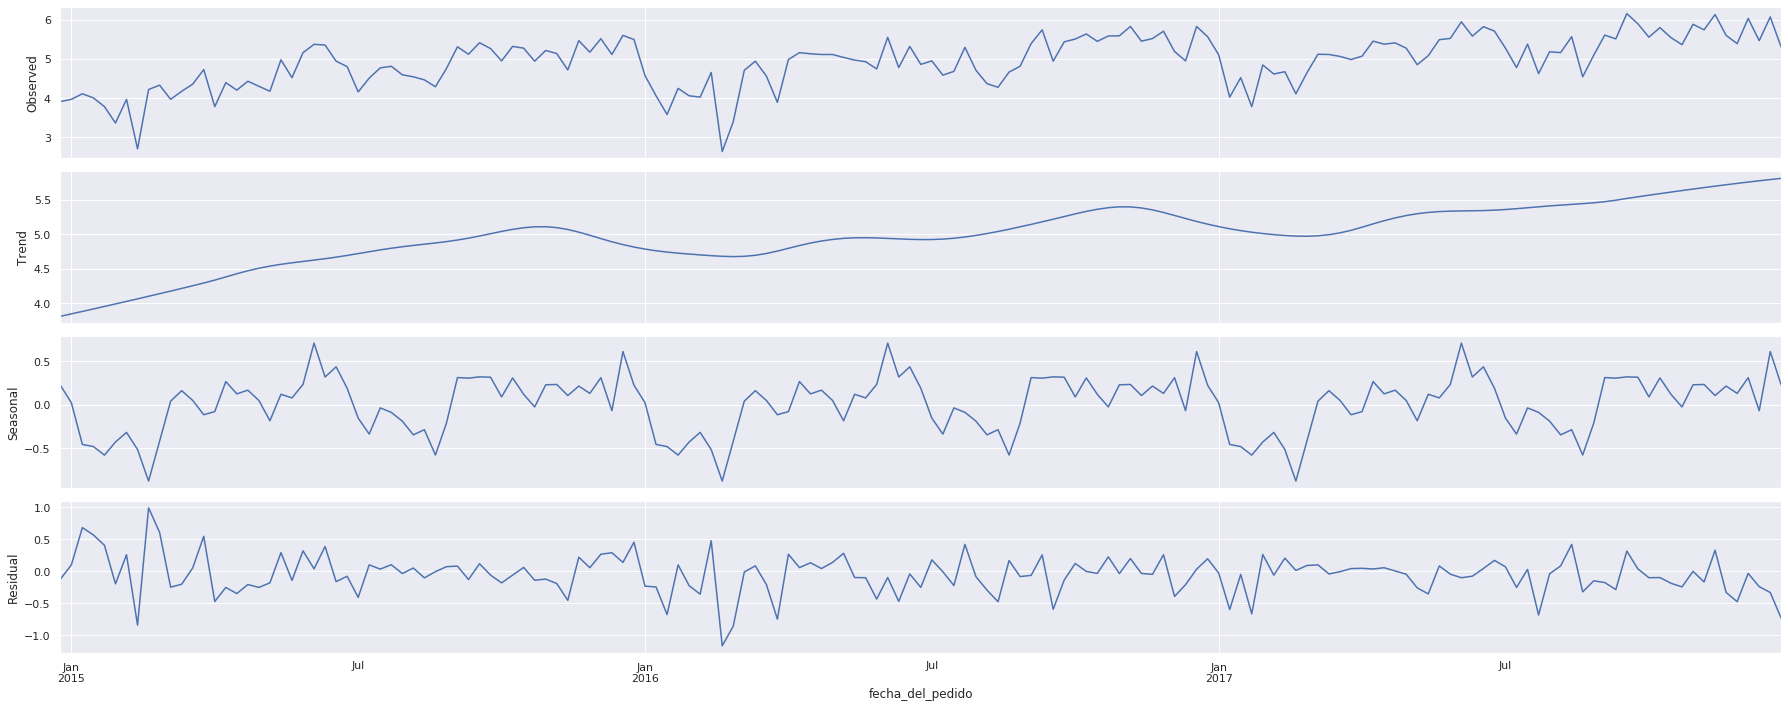

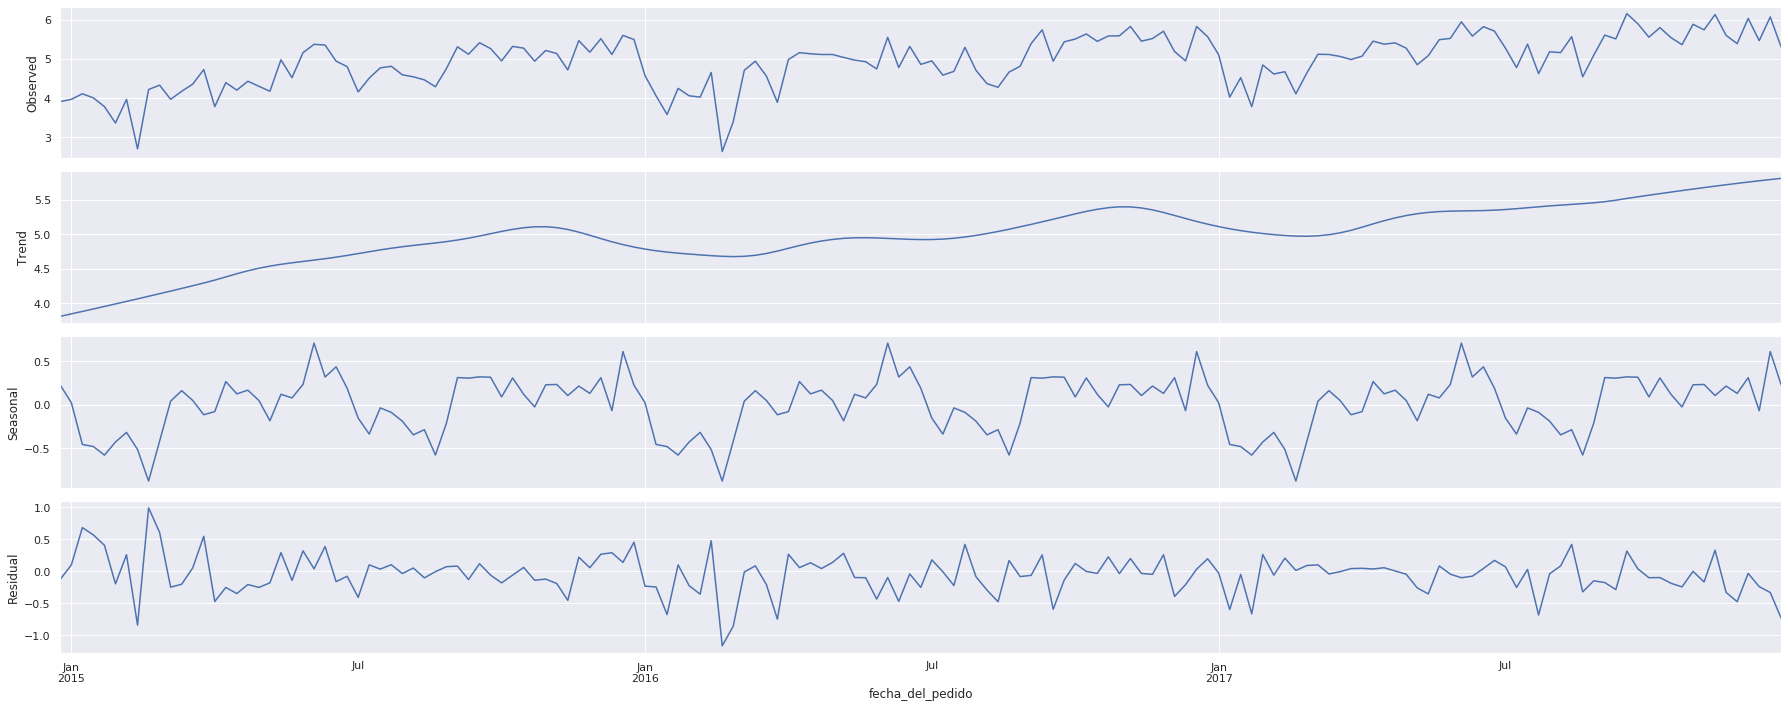

In [87]:
stl.plot()

In [89]:
sa_act = (stl.resid + stl.trend)
adj_y = stl.seasonal.cantidad.values[1:52]
#adj_oi = stl.seasonal.cantidad.values[8:104]

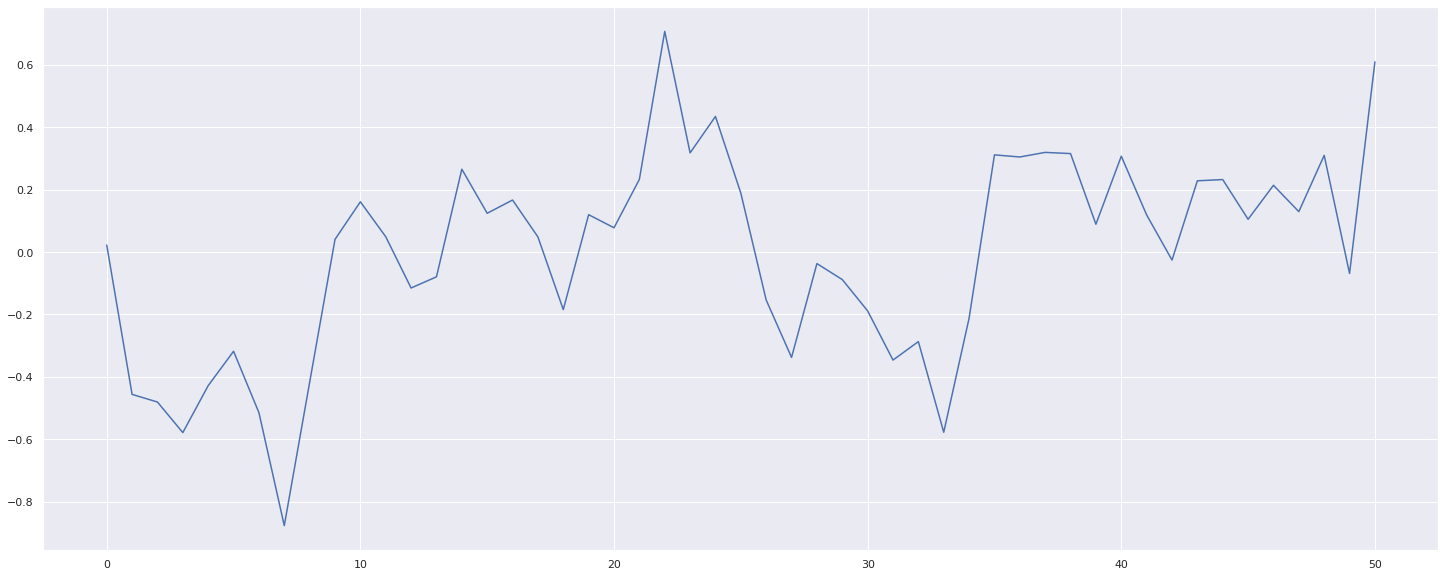

In [93]:
plt.plot(adj_y)
plt.show()

In [94]:
with pm.Model() as model:
    k_=pm.Uniform('k',-1,1)
    tau_=pm.Gamma('tau',mu=1,sd=1)
    obs=pm.AR1('observed',k=k_,tau_e=tau_,observed=sa_act)
    trace=pm.sample(tune=1800)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [tau, k]
Sampling 4 chains: 100%|██████████| 9200/9200 [00:03<00:00, 2745.27draws/s]
There were 3 divergences after tuning. Increase `target_accept` or reparameterize.
There were 8 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7213256867174407, but should be close to 0.8. Try to increase the number of tuning steps.


/home/qsergio/miniconda3/envs/demanda/lib/python3.7/site-packages/pymc3/stats.py:991: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  axis=1, join_axes=[dforg.index])


         mean        sd  mc_error   hpd_2.5  hpd_97.5       n_eff      Rhat
k    0.992041  0.005634  0.000176  0.981279  0.999995  982.014557  1.002204
tau  3.656830  0.403903  0.012577  2.899296  4.467684  880.623516  1.000585


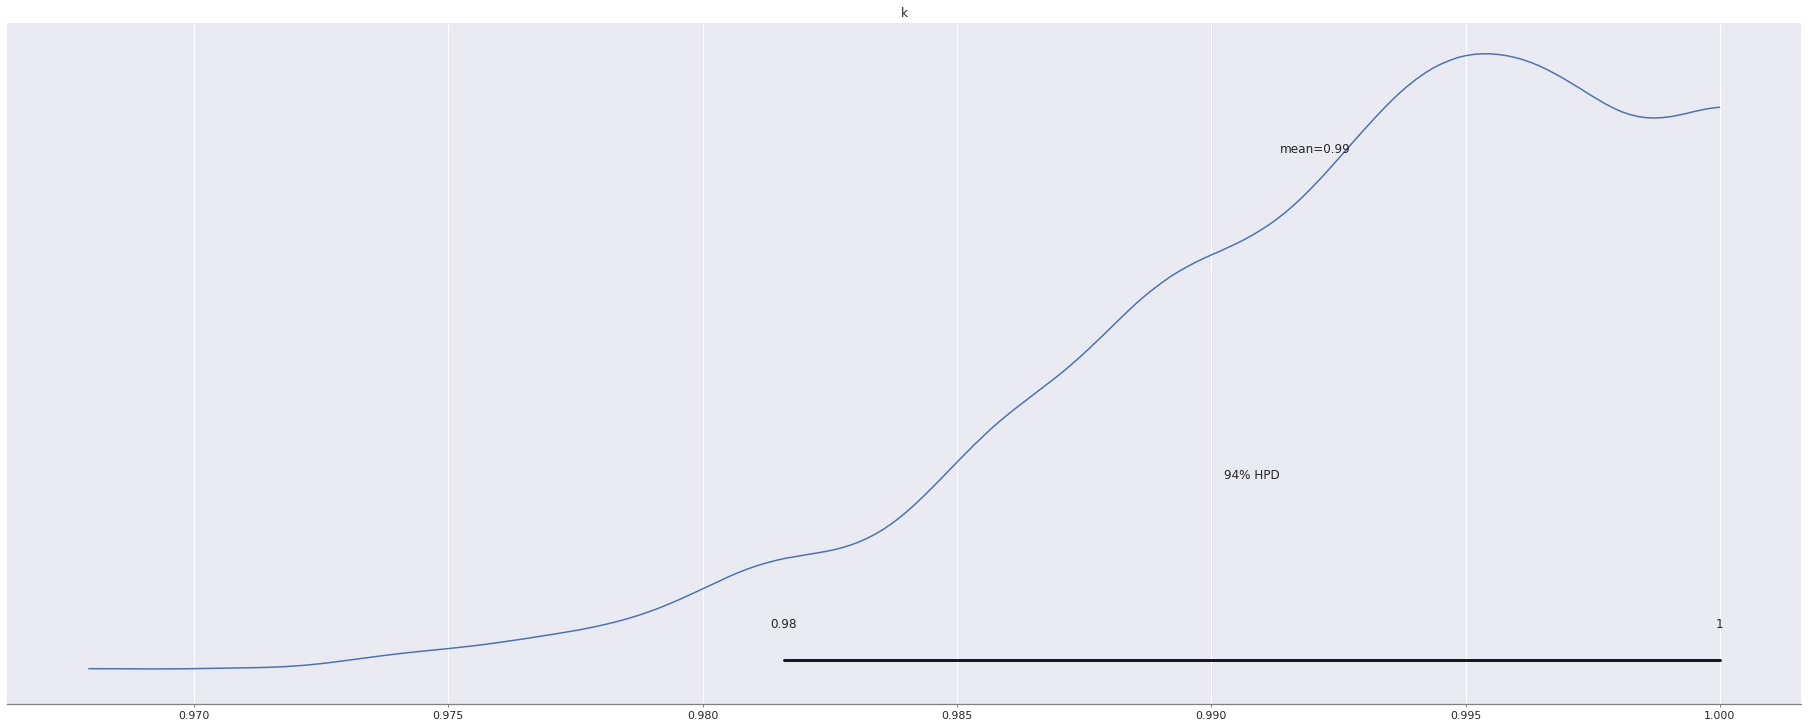

In [95]:
pm.plot_posterior(trace,'k')
print(pm.summary(trace))

In [37]:
sa_act = (stl.resid + stl.trend)
adj_pv = stl.seasonal.cantidad.values[52:79]
adj_oi = stl.seasonal.cantidad.values[80:104]

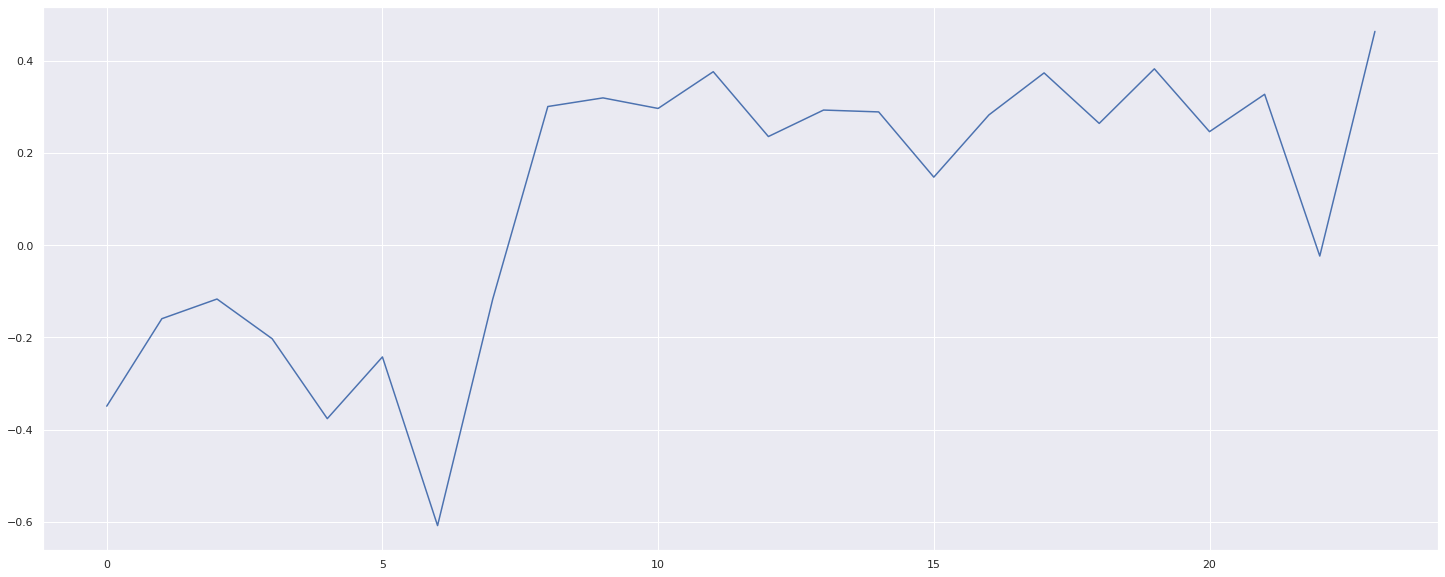

In [38]:
plt.plot(adj_oi)
plt.show()

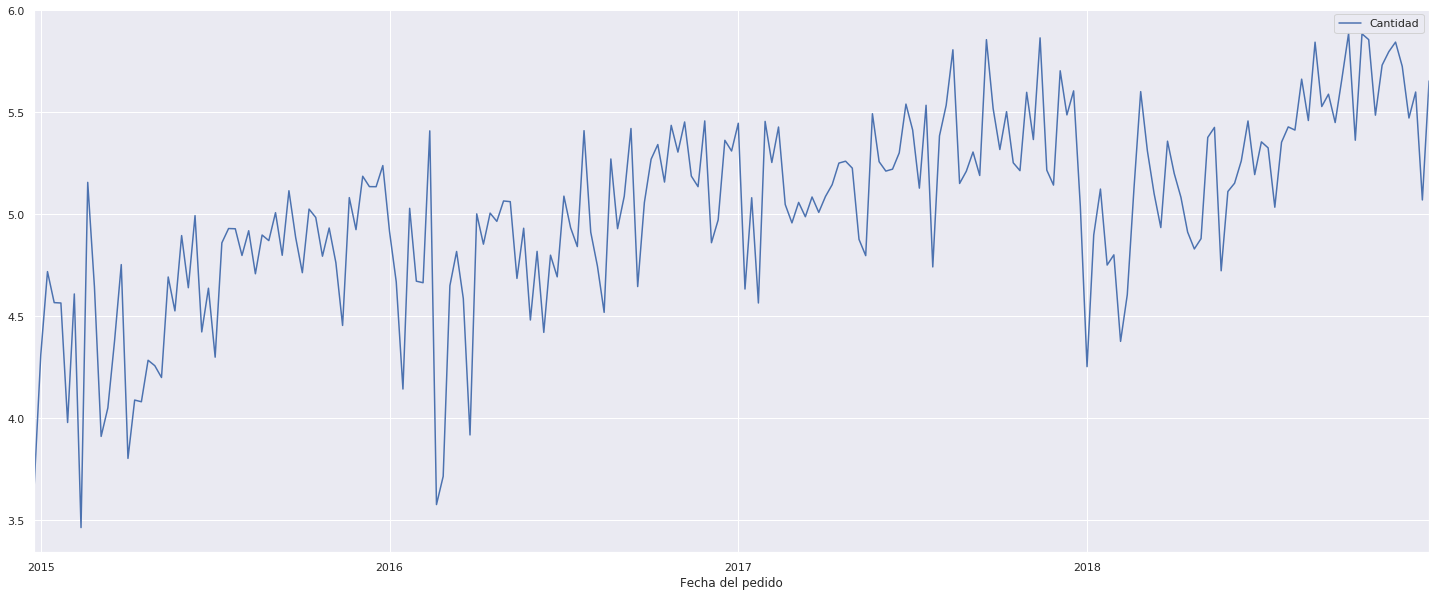

In [24]:
sa_act.plot()

In [39]:
sa_act.to_csv("data_retail.csv")

In [123]:
import pmdarima as pm
cv_arima = pm.ARIMA( order=(0, 1, 1), seasonal_order=(1, 1, 0, 52))
cv_fit = cv_arima.fit(act_train)

In [139]:
 forecastin = cv_fit.predict(52,return_conf_int=True, alpha=0.05)

In [158]:
lower_series = pd.Series(forecastin[1][:, 0], index=act_test.index)
upper_series = pd.Series(forecastin[1][:, 1], index=act_test.index)

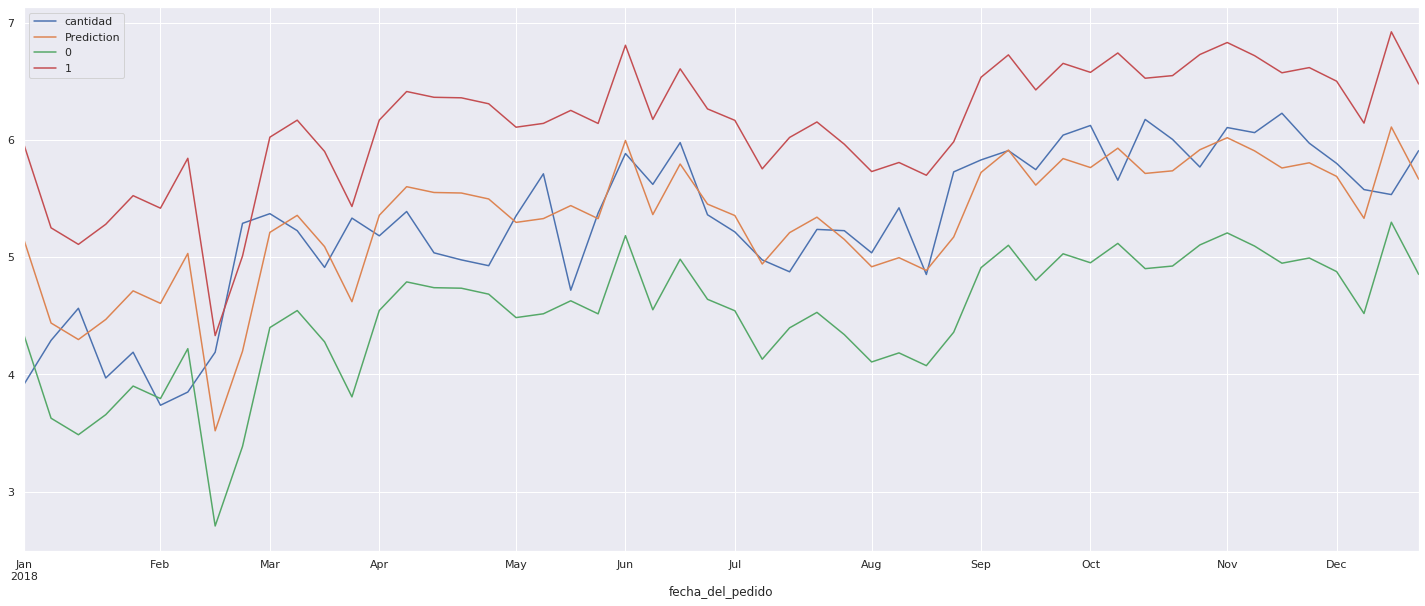

In [159]:
future_forecast = pd.DataFrame(forecastin[0], index = act_test.index,columns=['Prediction'])

pd.concat([act_test,future_forecast,lower_series,upper_series],axis=1).plot()

In [113]:
#from pyramid.arima import auto_arima
from pmdarima.arima import auto_arima
stepwise_model = auto_arima(act_train, start_p=1, start_q=1,
                           max_p=2, max_q=2, m=52,
                           start_P=0, seasonal=True,
                           d=1, D=1, trace=True,
                           error_action='ignore',  
                           suppress_warnings=True, 
                           stepwise=True,parallel=True)
print(stepwise_model.aic())

Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=243.499, BIC=248.788, Fit time=0.315 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=189.120, BIC=199.697, Fit time=8.161 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(0, 1, 0, 52); AIC=218.496, BIC=226.429, Fit time=0.642 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 0, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(2, 1, 1, 52); AIC=nan, BIC=nan, Fit time=nan seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=218.026, BIC=225.959, Fit time=5.245 seconds
Fit ARIMA: order=(2, 1, 0) seasonal_order=(1, 1, 0, 52); AIC=184.887, BIC=198.109, Fit time=10.9

In [103]:
n_preds = 52

In [105]:
forecast = cv_fit.forecast(n_preds)

In [106]:
test = forecast[0]

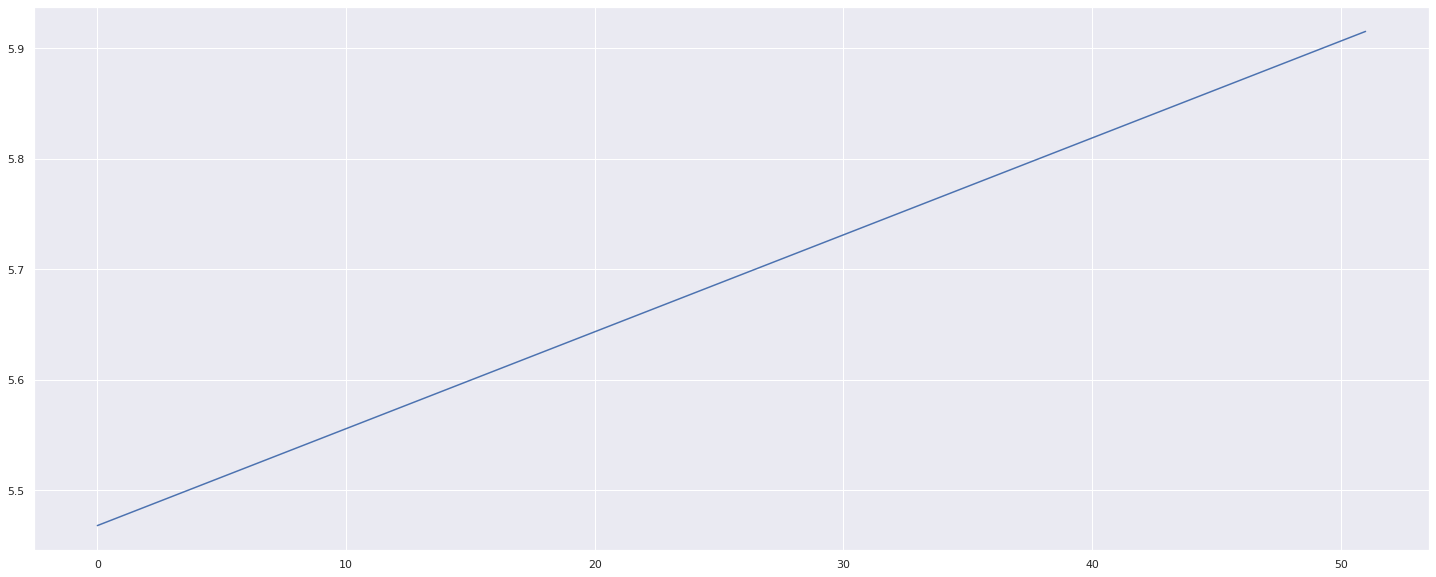

In [107]:
plt.plot(test)
plt.show()

In [55]:
act_pred = (
    pd.DataFrame({'unadjusted_mean':forecast[0], 
              'error':forecast[1], 
              'lower_ci':forecast[2][:,0],
             'upper_ci':forecast[2][:,1],
             'estacionalidad':adj_pv[-n_preds:]})
            .assign(adjusted_mean = lambda x: x.estacionalidad + x.unadjusted_mean)
)

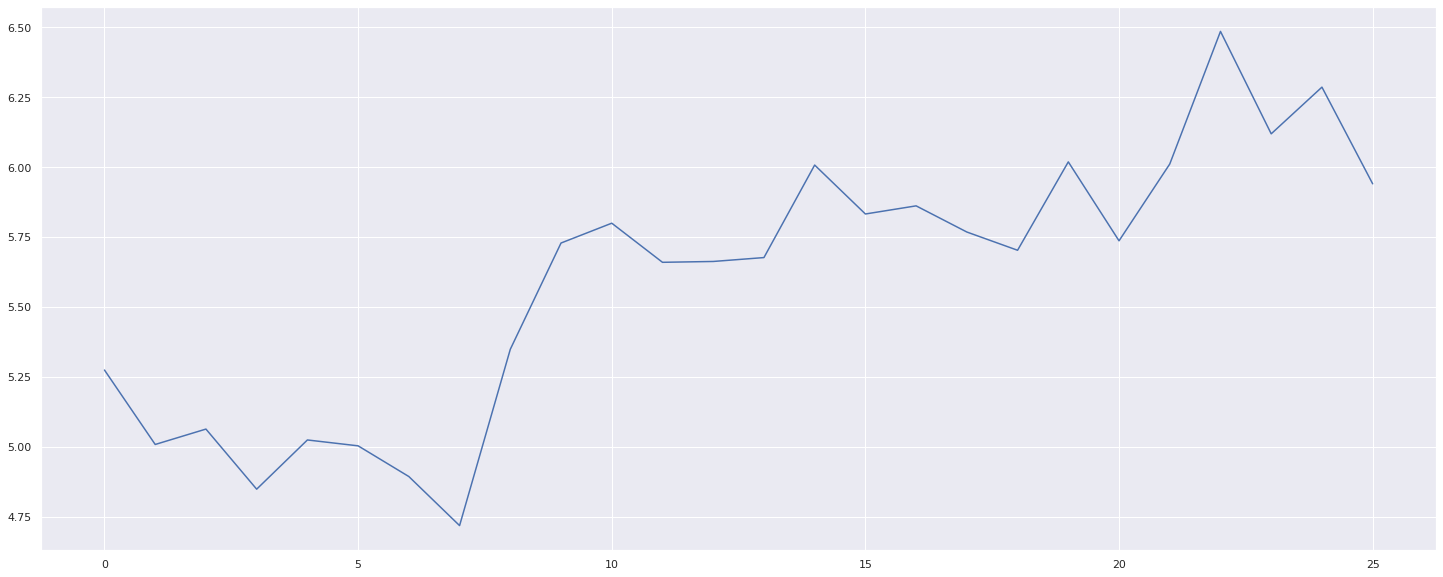

In [56]:
plt.plot(act_pred.adjusted_mean)
plt.show()


In [57]:
import pandas as pd
from pmprophet.model import PMProphet, Sampler

ModuleNotFoundError: No module named 'pmprophet'

In [11]:
#act = pd.read_csv("act_nn.csv")
#df = df.head(180)
df = data2

In [ ]:
# Fit both growth and intercept
m = PMProphet(df, growth=True, intercept=True, n_changepoints=20, changepoints_prior_scale=.001, name='model')

# Add monthly seasonality (order: 3)
m.add_seasonality(seasonality=52, fourier_order=3)

In [ ]:
# Add weekly seasonality (order: 3)
m.add_seasonality(seasonality=26, fourier_order=3)

In [ ]:
# Fit the model (using NUTS)
m.fit(method=Sampler.NUTS)

In [ ]:
ddf = m.predict(26, alpha=0.2, include_history=True, plot=True)
m.plot_components(intercept=False)

In [29]:
from fbprophet import Prophet

In [15]:
df = pd.read_csv('data_retail.csv')

In [30]:
# Python
m = Prophet(yearly_seasonality=True)
m.fit(data2)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [31]:
future = m.make_future_dataframe(periods=26,freq = 'w')
future.tail()

ds
230 2019-05-26
231 2019-06-02
232 2019-06-09
233 2019-06-16
234 2019-06-23

In [32]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head()

ds        yhat  yhat_lower  yhat_upper
0 2014-12-29  106.062481   32.670122  178.044138
1 2015-01-05   36.175478  -33.411389  109.214926
2 2015-01-12   -9.508539  -78.581733   58.676567
3 2015-01-19  -13.872601  -85.328837   58.763506
4 2015-01-26    2.106857  -68.873062   67.272974

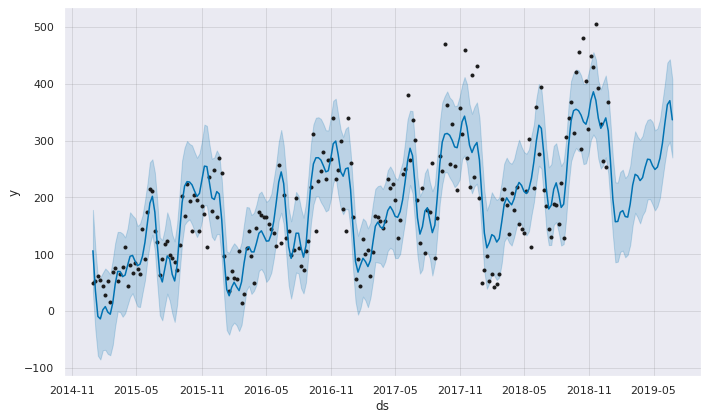

In [33]:
fig1 = m.plot(forecast)

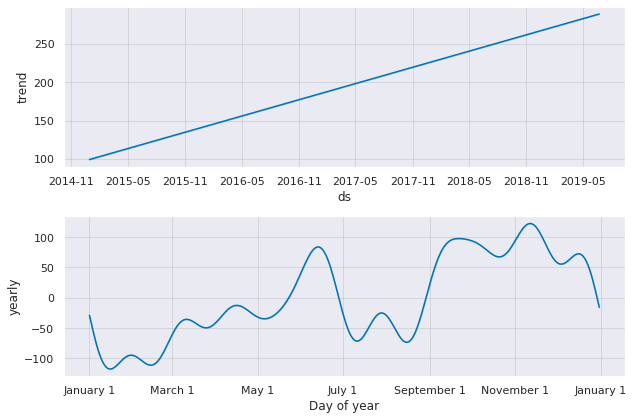

In [34]:
fig2 = m.plot_components(forecast)

In [25]:
from fbprophet.plot import plot_plotly
import plotly.offline as py
py.init_notebook_mode()

fig = plot_plotly(m, forecast)  # This returns a plotly Figure
py.iplot(fig)


NameError: name 'go' is not defined

In [24]:
import plotly.graph_objs as go


In [ ]:
data2['Mes'] = data2.index.month
data2['Semana'] = data2.index.week
data2['Dia_semana'] = data2.index.day_name()

In [ ]:
plt.scatter(df_rat_by_year.index, df_rat_by_year)
plt.xlabel('year of release')
plt.ylabel('median rating');

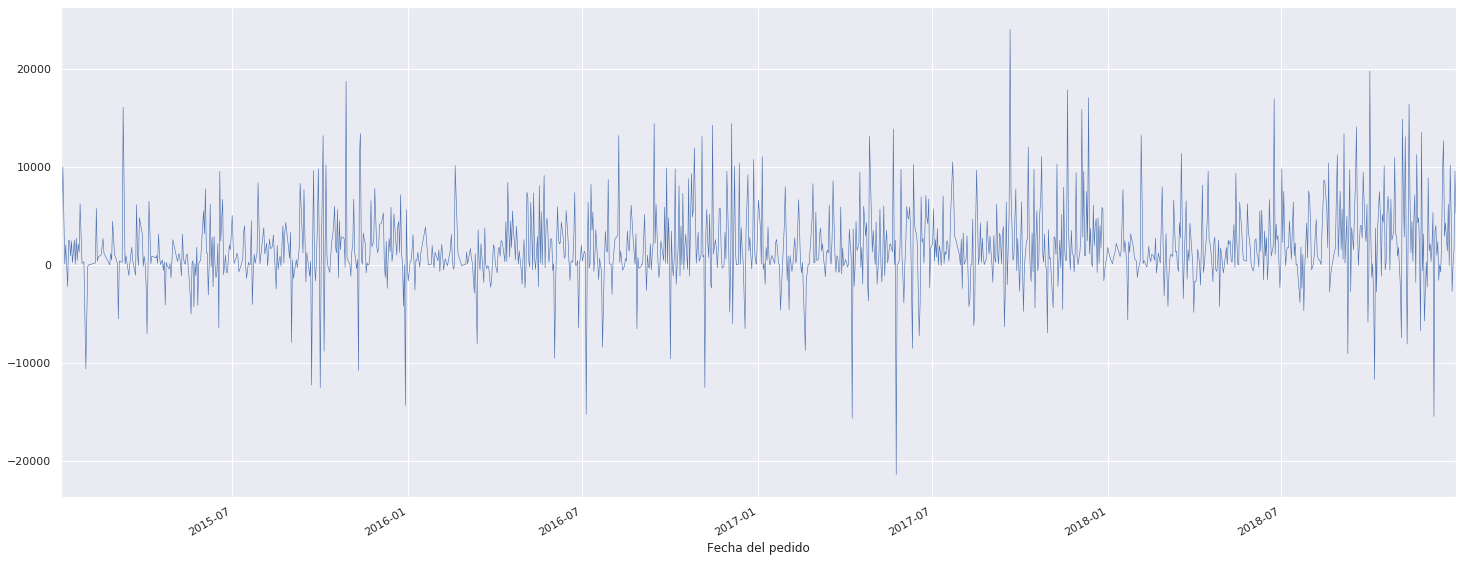

In [25]:
df_g = data.groupby("Fecha del pedido")['Ganancia'].sum()
df_g = pd.DataFrame({'Ganancia':df_g})
df_g['Ganancia'].plot(linewidth=0.6)

In [19]:
data1 = data.Anio.isin( ['2016','2017','2018'])
data1.head()

Fecha del pedido
2015-01-03    False
2015-01-04    False
2015-01-04    False
2015-01-04    False
2015-01-04    False
Name: Anio, dtype: bool

In [26]:
df = data1.groupby("Fecha del pedido")
df_cantidad = pd.DataFrame({'Cantidad':df})
#df_cantidad=df_cantidad.Anio.isin( ['2016','2017','2018'])
#df_cantidad.head()
df_cantidad['Cantidad'].plot(linewidth=0.55)

NameError: name 'data1' is not defined

In [24]:
df_cant2 = data.groupby(["Fecha del pedido","Semana"])[['Cantidad']].sum()

In [25]:
df_cant2.head

<bound method NDFrame.head of                          Cantidad
Fecha del pedido Semana          
2015-01-03       1              4
2015-01-04       1             38
2015-01-05       2              8
2015-01-07       2              7
2015-01-08       2             10
...                           ...
2018-12-27       52            61
2018-12-28       52             9
2018-12-29       52            92
2018-12-30       52            47
2018-12-31       1             52

[1224 rows x 1 columns]>

In [27]:
df_cantidad.loc['2017','Cantidad'].plot() #df_cantidad['Cantidad'].plot(linewidth=0.6)

NameError: name 'df_cantidad' is not defined

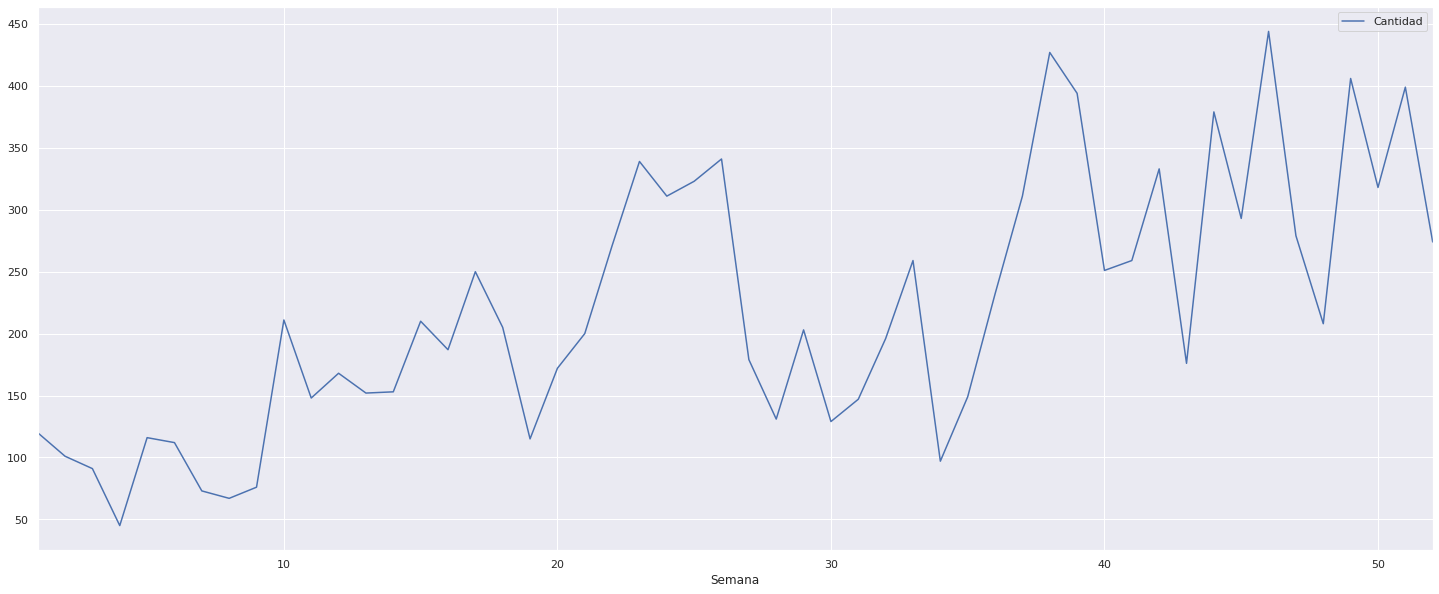

In [26]:
#data['Semana'] = data.index.week
data.loc['2017', ['Semana','Cantidad']].groupby(['Semana']).sum().plot()

In [114]:
data.head()

Id. de la fila  Id. del pedido Fecha de envío  \
Fecha del pedido                                                  
2015-01-03                  8187  MX-2015-160234     2015-01-07   
2015-01-04                 10118  US-2015-136007     2015-01-11   
2015-01-04                  1971  MX-2015-111255     2015-01-09   
2015-01-04                  1970  MX-2015-111255     2015-01-09   
2015-01-04                  9067  MX-2015-159373     2015-01-08   

                 Forma de envío Id. del cliente Nombre del cliente  \
Fecha del pedido                                                     
2015-01-03             Estándar        SC-20785      Sandra Crespo   
2015-01-04             Estándar        AH-11305  Ariadna Hernández   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04               Rápido        PC-19915  Patrocinio Castro   
2015-01-04             Estándar        AC-10930   Anabel Caraballo   

                         Segmento             Ciudad            Estado  \
Fecha del pedido                                                         
2015-01-03                Cliente              Mixco         Guatemala   
2015-01-04        Pequeña empresa              Pilar           Alagoas   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04                Cliente  Francisco Beltrão            Paraná   
2015-01-04        Pequeña empresa   Santiago de Cuba  Santiago de Cuba   

                       País  ... Subcategoría  \
Fecha del pedido             ...                
2015-01-03        Guatemala  ...    Teléfonos   
2015-01-04           Brasil  ...       Sobres   
2015-01-04           Brasil  ...    Librerías   
2015-01-04           Brasil  ...  Suministros   
2015-01-04             Cuba  ...       Sobres   

                               Nombre del producto     Total Cantidad  \
Fecha del pedido                                                        
2015-01-03         Nokia Auriculares, Al por mayor   1952.00        4   
2015-01-04         Jiffy Sobres de uso interno, 50    743.04        6   
2015-01-04           Dania Librería clásica, Negro  16484.40        6   
2015-01-04                Fiskars Abrecartas, Azul   1489.60        8   
2015-01-04        Kraft Cierre adhesivo, Reciclado    385.80        3   

                 Descuento  Ganancia  Anio  Mes  Dia_semana  Semana  
Fecha del pedido                                                     
2015-01-03             0.0    448.80  2015    1    Saturday       1  
2015-01-04             0.6  -1078.56  2015    1      Sunday       1  
2015-01-04             0.0   6098.40  2015    1      Sunday       1  
2015-01-04             0.0    281.60  2015    1      Sunday       1  
2015-01-04             0.0     76.80  2015    1      Sunday       1  

[5 rows x 23 columns]

In [137]:
mu_dia = data.sort_values('Dia_semana').loc['2018',['Dia_semana','Cantidad']].reset_index().groupby('Dia_semana',as_index=False).mean()
mu_dia

Dia_semana  Cantidad
0     Friday  4.049180
1     Monday  3.515152
2   Saturday  3.760748
3     Sunday  3.721088
4   Thursday  3.759450
5    Tuesday  3.839934
6  Wednesday  3.744373

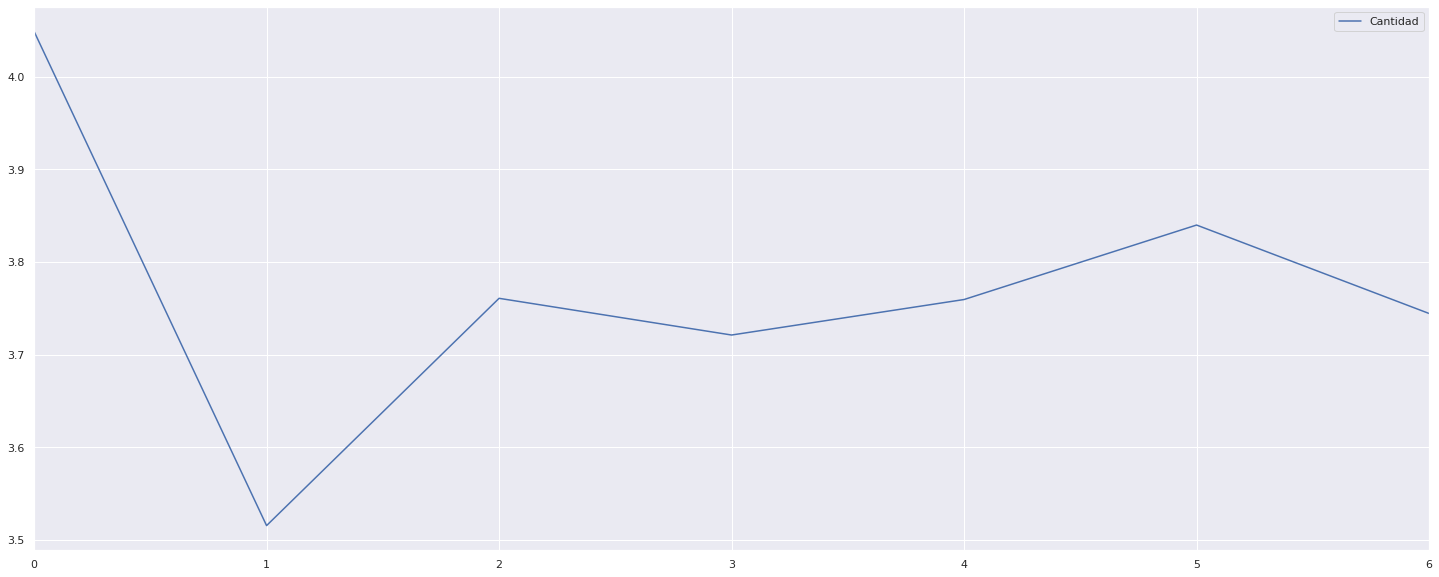

In [133]:
mu_dia.sort_index(axis=0).plot()

In [138]:
from pandas.plotting import autocorrelation_plot

In [139]:
df_cantidad.head()

Cantidad
Fecha del pedido          
2015-01-03               4
2015-01-04              38
2015-01-05               8
2015-01-07               7
2015-01-08              10

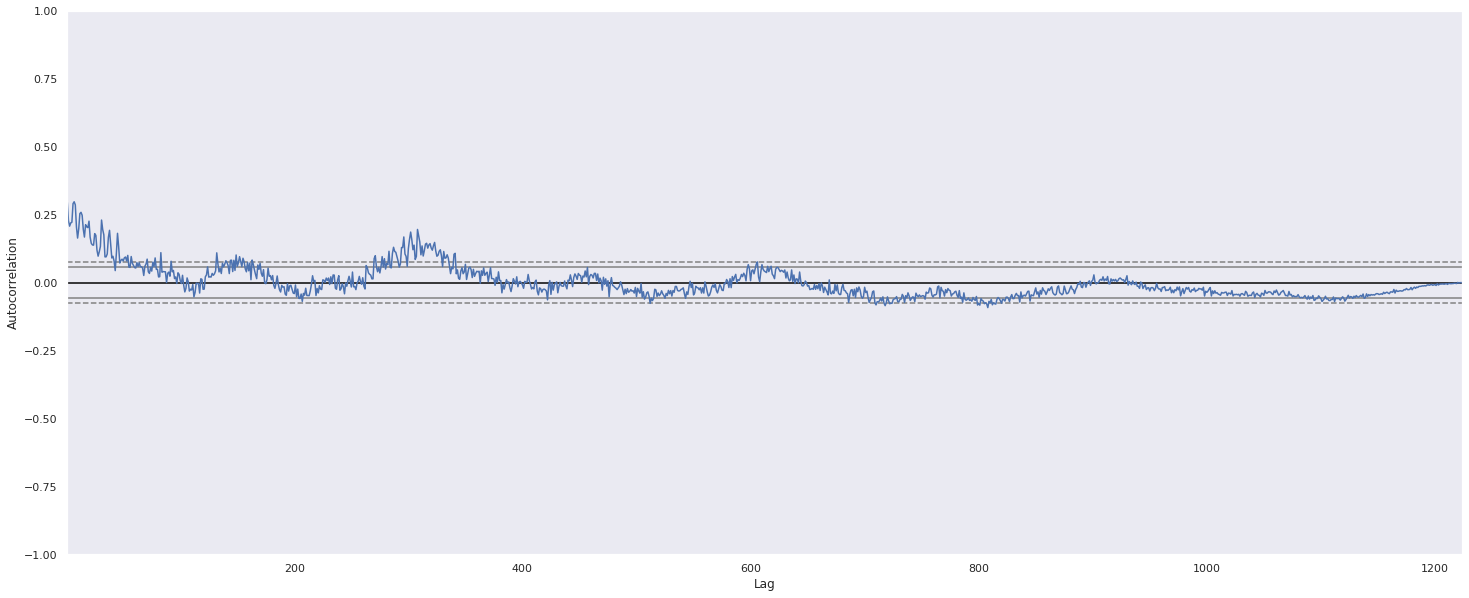

In [140]:
autocorrelation_plot(df_cantidad.Cantidad)

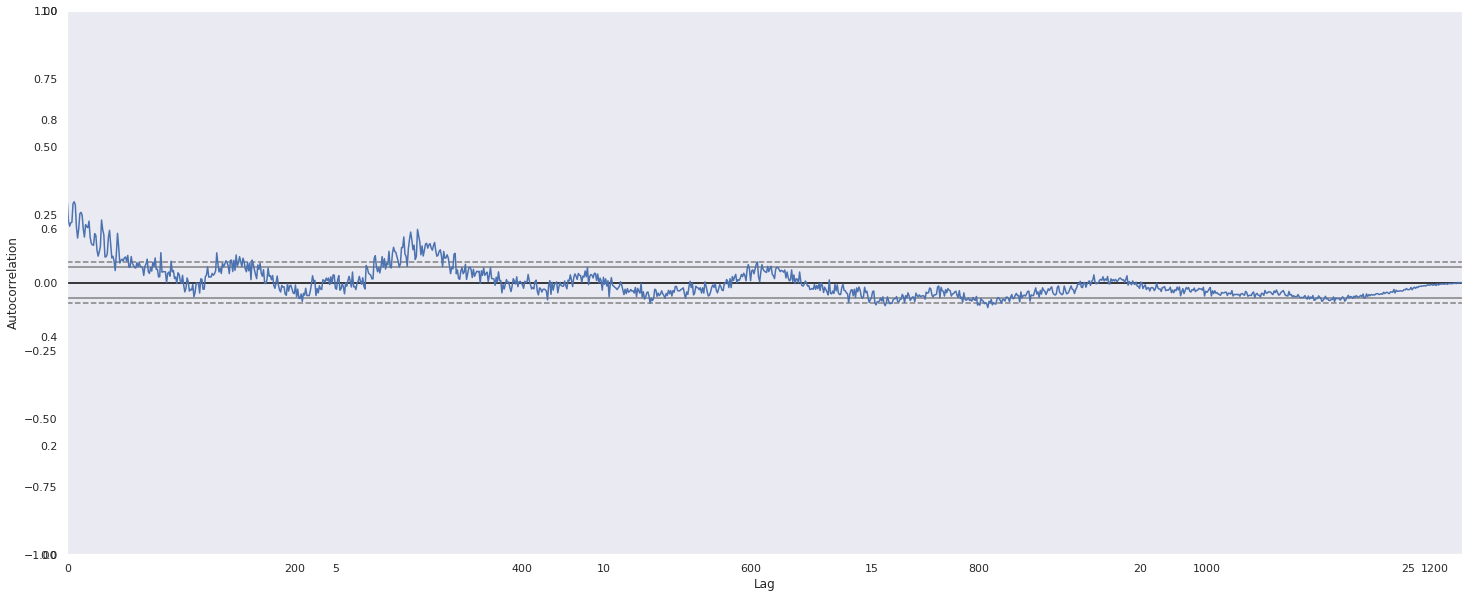

In [147]:
fig, ax= plt.subplots();
autocorrelation_plot(df_cantidad.Cantidad)
ax.set_xlim(0,26);